In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate
        self._b = 0.0
        self._w = None
        self.misclassified_samples = []
    def fit(self, x: np.array, y: np.array, n_iter=10):
        self._b = 0.0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []
        for _ in range(n_iter):
            errors = 0
            for xi,yi in zip(x,y):
                update = self.learning_rate * (yi-self.predict(xi))
                self._b += update
                self._w += update*xi
                errors += int(update != 0.0)
            self.misclassified_samples.append(errors)
    def f(self,x:np.array) -> float:
        return np.dot(x,self._w) + self._b
    def predict(self, x:np.array):
        return np.where(self.f(x) >= 0,1,-1)

df=pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


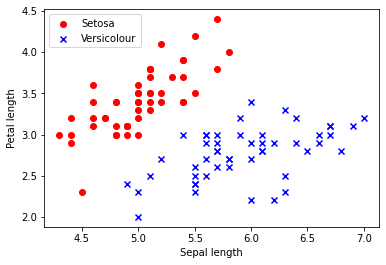

In [2]:
#Extract the label column
y=df.iloc[:, 4].values
x=df.iloc[:,0:3].values

plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x',label='Versicolour')
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend(loc='upper left')

plt.show()

In [3]:
y = np.where(y=="Iris-setosa",1,-1)
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [4]:
x[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)
classifier = Perceptron(learning_rate=0.01)
classifier.fit(x_train, y_train)
print("accuracy",accuracy_score(classifier.predict(x_test),y_test)*100)


accuracy 100.0


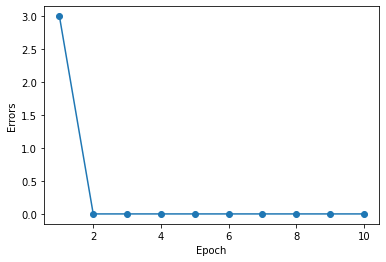

In [5]:
plt.plot(range(1,len(classifier.misclassified_samples)+1),classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()